In [1]:
#Libraries
import numpy as np
import random
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import time
import random

In [2]:
#Generating points (city coordinates)
def coordinates(ao_points):
    points = []
    for _ in range(ao_points):
        x = random.randint(-100, 100)
        y = random.randint(-100, 100)
        z = random.randint(0, 50)
        points.append((x, y, z))
    return points

import math
import random

# Function to calculate distances between two points
def distances(point1, point2):
    distances = math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2 + (point1[2] - point2[2])**2)
    if point1[2] < point2[2]:
        distances *= 1.1
    else:
        distances *= 0.9
    return distances

# Function to generate the distance matrix
def generate_distance_matrix(points):
    num_points = len(points)
    distance_matrix = [[0] * num_points for _ in range(num_points)]

    while True:
      for i in range(num_points):
        for j in range(i+1, num_points):
          if random.random() < 0.2 and distance_matrix[i][j] != -1:
            distance_matrix[i][j] = -1
            distance_matrix[j][i] = -1

      if all(any(val > 0 for val in row) for row in distance_matrix):
        return distance_matrix

      else:
        distance_matrix = [[0] * num_points for _ in range(num_points)]
        for i in range(num_points):
          for j in range(num_points):
            distance_matrix[i][j] = distances(points[i], points[j])

distance_matrix = generate_distance_matrix(coordinates(5))

#Greedy methods


**Greedy methods** is an approach to solving problems in which we make the best possible choice at every step, hoping that the whole thing will be optimal. In short, we only look at the present moment and choose what seems best now, without looking at what may happen later. These algorithms are simple and fast, but they do not always give the best results, but they guarantee finding a not the worst solution.


###Nearest neighbors (NN)


The **Nearest Neighbors** algorithm, in the context of our problem, involves selecting a starting city and then iteratively selecting the nearest unvisited city as the next waypoint until all cities have been visited.

**Implementation of the NN method:**


In [3]:
def NN(distance_matrix):
    n = len(distance_matrix)
    current_city = 0  # Start from city 0
    visited = [current_city]
    total_distance = 0  # Total distance of the traveled route

    while len(visited) < n:
        nearest_city = None
        min_distance = float('inf')
        found_valid_city = False

        for city in range(n):
            if city not in visited and distance_matrix[current_city][city] != -1:
                found_valid_city = True
                if distance_matrix[current_city][city] < min_distance:
                    nearest_city = city
                    min_distance = distance_matrix[current_city][city]

        if not found_valid_city:
            return "The route composed of the shortest connections is impossible to travel"
            break

        total_distance += min_distance
        visited.append(nearest_city)
        current_city = nearest_city

        if len(visited) == n:
            if distance_matrix[visited[-1]][0] != -1:
                total_distance += distance_matrix[visited[-1]][0]
                visited.append(0)

                return visited, total_distance
            else:
                return "Cannot return to the last city"

###K Nearest Neighbors (KNN)


Instead of one best neighbor, as in classical NN, the **KNN algorithm** selects K best neighbors.


**Implementation of the KNN method:**


In [4]:
def KNN(distance_matrix, K=3):
    n = len(distance_matrix)
    current_city = 0
    visited = [[current_city]] * K
    total_distance = [0] * K  # Total distance of the traveled route
    nearest_cities = [current_city] * K
    min_distance = [float('inf')] * K

    for k in range(K):  # First K nearest connections
        for city in range(n):
            if len(visited[k]) == 1:
                if city not in visited[k] and city not in nearest_cities and distance_matrix[current_city][city] != -1:
                    found_valid_city = True
                    if distance_matrix[current_city][city] < min_distance[k]:
                        nearest_cities[k] = city
                        min_distance[k] = distance_matrix[current_city][city]

    for i in range(len(nearest_cities)):
        visited[i] = visited[i] + [nearest_cities[i]]
        total_distance[i] += min_distance[i]

    for j in range(n - 2):
        min_distance = [float('inf')] * K
        min_dist = float('inf')
        best_path = []
        check = 0

        for k in range(K):  # NN for each of the first neighbors
            for city in range(n):
                if city not in visited[k] and distance_matrix[visited[k][-1]][city] != -1:
                    if distance_matrix[visited[k][-1]][city] < min_distance[k]:
                        nearest_cities[k] = city
                        min_distance[k] = distance_matrix[visited[k][-1]][city]

        for i in range(len(nearest_cities)):
            visited[i] = visited[i] + [nearest_cities[i]]
            total_distance[i] += min_distance[i]

        for k in range(K):  # When there is no connection between the last city and the starting city
            if len(visited[k]) == n:
                if distance_matrix[visited[k][-1]][0] != -1:
                    total_distance[k] += distance_matrix[visited[k][-1]][0]
                    visited[k].append(0)
                else:
                    check += 1

        if check == K:
            return f"No connection between the last city and the starting city for the first {K} neighbors"

        if all(len(visited[k]) == n + 1 for k in range(K)):  # When all routes ultimately have a length of inf
            if all(total_distance[k] == float('inf') for k in range(K)):
                return "There is no route meeting the conditions of the problem"

        for k in range(K):
            if len(visited[k]) == n + 1:
                if total_distance[k] < min_dist:
                    best_path = visited[k]
                    min_dist = total_distance[k]

    return [best_path, min_dist]

##Comparison with time


In [5]:
random.seed(254468)

times_NN = []
times_KNN = []

for i in range(4, 13):

    print(f"Results for {i} cities:")

    points = coordinates(i)
    distance_matrix = generate_distance_matrix(points)

    start = time.time()
    print(f"NN result: {NN(distance_matrix)}")
    end = time.time()
    times_NN.append(end - start)

    start = time.time()
    print(f"KNN result: {KNN(distance_matrix, K=4)}")
    end = time.time()
    times_KNN.append(end - start)
    print("")

Results for 4 cities:
NN result: ([0, 1, 2, 3, 0], 447.40753503738745)
KNN result: [[0, 1, 2, 3, 0], 447.40753503738745]

Results for 5 cities:
NN result: The route composed of the shortest connections is impossible to travel
KNN result: [[0, 1, 4, 2, 3, 0], 405.1440613871821]

Results for 6 cities:
NN result: The route composed of the shortest connections is impossible to travel
KNN result: [[0, 2, 5, 1, 4, 3, 0], 472.35414773806076]

Results for 7 cities:
NN result: ([0, 1, 2, 6, 4, 3, 5, 0], 569.2011883698226)
KNN result: [[0, 1, 2, 6, 4, 3, 5, 0], 569.2011883698226]

Results for 8 cities:
NN result: Cannot return to the last city
KNN result: No connection between the last city and the starting city for the first 4 neighbors

Results for 9 cities:
NN result: ([0, 8, 1, 5, 4, 7, 2, 6, 3, 0], 758.8233364515031)
KNN result: [[0, 8, 1, 5, 4, 7, 2, 6, 3, 0], 758.8233364515031]

Results for 10 cities:
NN result: ([0, 6, 4, 2, 7, 5, 8, 1, 9, 3, 0], 1012.9055014252247)
KNN result: [[0, 2, 7

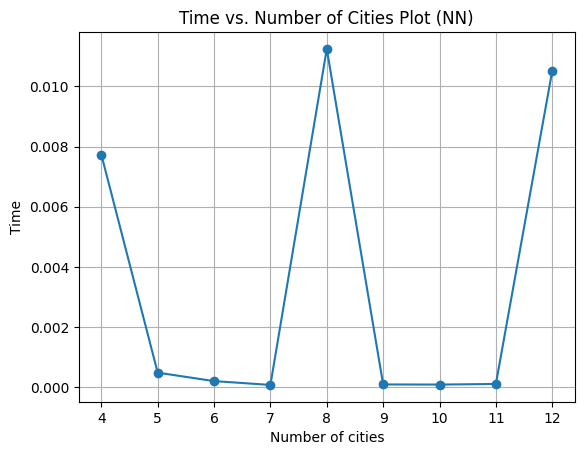

In [6]:
i_values = range(4, 13)

plt.plot(i_values, times_NN, marker='o', linestyle='-')

plt.xlabel('Number of cities')
plt.ylabel('Time')
plt.title('Time vs. Number of Cities Plot (NN)')

plt.grid(True)

plt.show()

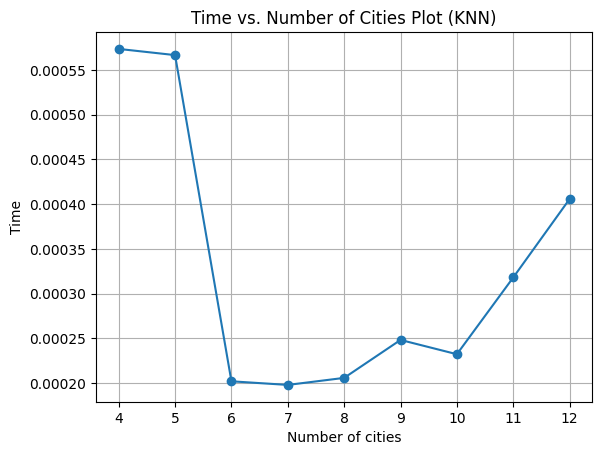

In [7]:
i_values = range(4, 13)

plt.plot(i_values, times_KNN, marker='o', linestyle='-')

plt.xlabel('Number of cities')
plt.ylabel('Time')
plt.title('Time vs. Number of Cities Plot (KNN)')

plt.grid(True)

plt.show()

As you can see, the **KNN method** is slightly more computationally complex, which is indicated by the time in which the algorithm coped with a larger number of cities to travel through. It is worth noting that the **KNN method** returns "better" results and is able to find a route when the **NN method** cannot. We can therefore conclude that **KNN**, although slower, returns better results.
